[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.000s...
[t-SNE] Computed neighbors for 256 samples in 0.242s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.278061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.109493
[t-SNE] KL divergence after 1000 iterations: 0.292805


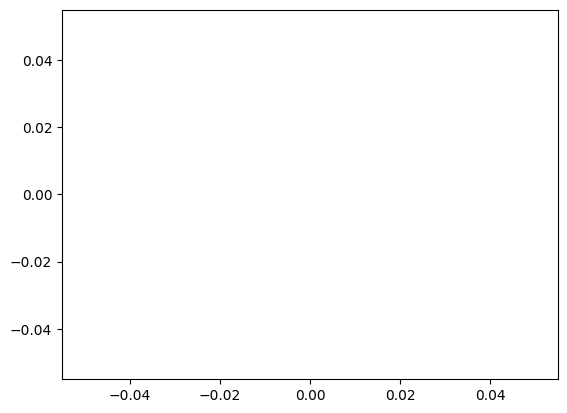

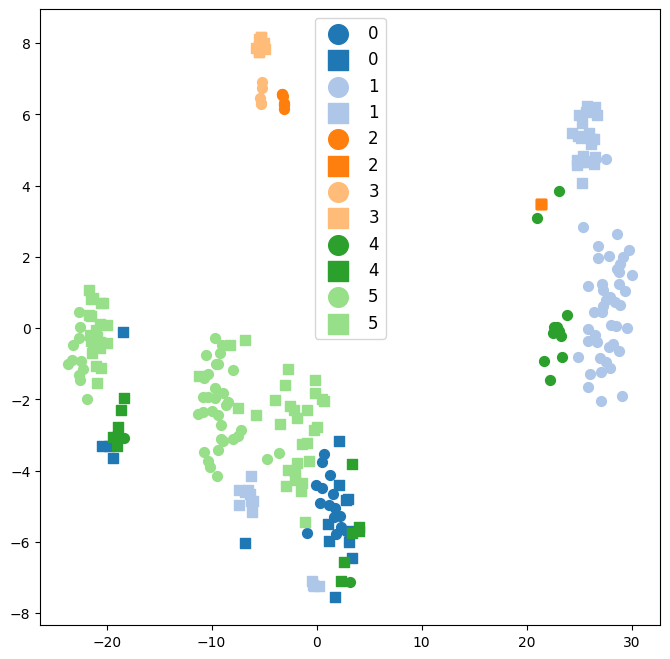

In [1]:
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

with open('saved_dictionary2.pickle', 'rb') as f:
    loaded_dict = pickle.load(f)

src_f, src_y, trg_f, trg_y, accl = loaded_dict['1'],loaded_dict['2'],loaded_dict['3'],loaded_dict['4'],loaded_dict['acc']

plt.plot(accl)
all_f = np.vstack((src_f, trg_f))

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(all_f)

# Plot those points as a scatter plot and label them based on the pred labels
cmap = matplotlib.colormaps['tab20']
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 6

for activity in range(num_categories):
    indices = trg_y==activity
    indices2 = src_y==activity
    tsne_src, tsne_trg = tsne_proj[0:len(src_f)],tsne_proj[len(src_f):]
    ax.scatter(tsne_src[indices2,0],tsne_src[indices2,1], s=50,marker='o',c=np.array(cmap(activity)).reshape(1,4), label = activity)
    ax.scatter(tsne_trg[indices,0],tsne_trg[indices,1],s=50,  marker='s',c=np.array(cmap(activity)).reshape(1,4), label = activity)
    
ax.legend(fontsize='large', markerscale=2)
plt.show()